In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# [Contents]
1. [Linear Regression](#section1)
2. [Multicollinearity and its Solutions]
    - [Feature Selection](#section3)
    - [Regression Regularization](#section4)
3. [Adequacy of Regression Models](#section5)
4. [Logistic Regression](#section6)
5. [PCA](#section7)
6. [Gaussian Naive Bayes](#section8)
7. [KNN](#section9)
8. [LDA](#section10)
9. [Decision Tree](#section11)



[Exercise Set](#exercise_set)

### <font color='blue'>Before get into the details..</font>

#### 회귀모델 성능지표
- MSE: 예측값과 실제값의 오차제곱합
    - RMSE, MAE, MAPE
- R^2: 변수의 분산성이 총분산성을 얼마나 설명하는가?
- Adjusted R^2: R^2에 변수 수만큼 penalty를 부과한 꼴
- AIC: MSE에 변수 수만큼 penalty를 부과한 꼴
- BIC: AIC를 보완한 지표

#### 다중공선성 진단법
- "다중공선성은 회귀모델의 성능을 떨어뜨린다"
    - "y에 대한 x 변수들의 설명력이 서로 겹치는 상황"
- VIF: 변수들 간의 correlation을 판단
    - 일반적으로 VIF가 10이 넘으면 다중공선성을 의심한다.

#### 다중공선성 해결법
- 변수선택법(feature selection): 변수를 추가/제거해가며 모델의 성능지표(AIC 등)을 비교
    - 전진선택, 후진소거, Stepwise
- 변수제거
- 회귀계수 축소(regression regularization)
    - Ridge, Lasso, ElasticNet

#### 회귀분석의 적합성 진단
- 성능지표가 높게 나오더라도 이 회귀모델이 '적합한가'에 대한 진단이 필요한데, 이 진단을 '잔차분석'으로 한다.
- 잔차에 대한 세 가지 가정
    - 정규성: 잔차는 정규분포를 따른다.
        - qq plot을 통해 잔차가 정규분포를 따르는지 확인한다.
    - 독립성: t 시점 잔차와 t+1 시점 잔차에 상관성이 없다.
        - (t 시점 잔차 ~ t+1 시점 잔차) 산점도로 corr을 확인한다.
    - 등분산성: 예측값(y-hat)이 작든 크든 잔차의 분산이 일정하다.
        - (y-hat ~ resid) 산점도로 분산이 일정한지 확인한다.



#### 기타) 분류모델 성능지표
- 정확도(accuracy)
- 정밀도(precision), 재현율(recall), 특이도(speicifity)
- G-mean: (specificity * recall)^-1
- F1 measure: 2 * [(precision * recall) / (precision + recall)]
- ROC curve, AUC

# Linear Regression<a id='section1'></a>

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

boston = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Fastcampus/Boston_house.csv')
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


**타겟 데이터**<br>
1978 보스턴 주택 가격
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

**특징 데이터**
- CRIM: 범죄율
- INDUS: 비소매상업지역 면적 비율
- NOX: 일산화질소 농도
- RM: 주택당 방 수
- LSTAT: 인구 중 하위 계층 비율
- B: 인구 중 흑인 비율
- PTRATIO: 학생/교사 비율
- ZN: 25,000 평방피트를 초과 거주지역 비율
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
- AGE: 1940년 이전에 건축된 주택의 비율
- RAD: 방사형 고속도로까지의 거리
- DIS: 직업센터의 거리
- TAX: 재산세율

In [5]:
# target 제외한 데이터만 뽑기
boston_data = boston.drop(['Target'],axis=1)

## 변수 설정 target/crim/rm/lstat
target = boston[['Target']]
crim = boston[['CRIM']]
rm = boston[['RM']]
lstat = boston[['LSTAT']]

### target ~ crim linear regression

In [6]:
# crim변수에 상수항추가하기 
# 상수항을 추가하지 않으면 y절편값이 계산이 안 된다.
    # x변수값 + 상수값 = y값이 되어야 하는 거니까
    # crim값 + constant = target 형식으로 fitting하는 거다.
crim1 = sm.add_constant(crim, has_constant="add")

In [7]:
# sm.OLS 적합시키기
model1 = sm.OLS(target, crim1)
fitted_model1 = model1.fit()

In [8]:
# summary함수통해 결과출력
fitted_model1.summary()

# y의 총 변동성 중에 x(범죄율)이 설명하는 비율은 약 0.151이다 (R^2)
# 범죄율의 회귀계수는 -0.4152 (범죄율이 1 증가할 때, y가 약 0.4 감소한다)
# p value는 0에 가까우며, 매우 유의하다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           1.17e-19
Time:                        14:32:07   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## 회귀 계수 출력
fitted_model1.params

const    24.033106
CRIM     -0.415190
dtype: float64

In [ ]:
#회귀 계수 x 데이터(X)

# np.dot 즉 벡터 내적으로 계산한다.
    # crim1 np.dot fitted_model1.params 는...
    # (상수1, x변수)의 행벡터 * (y절편, coefficient)의 열벡터 =   y절편 + (x변수 * coefficient)
np.dot(crim1,fitted_model1.params)[:5]

array([24.03048217, 24.02176733, 24.02177563, 24.01966646, 24.00443729])

In [ ]:
## predict함수를 통해 yhat구하기
pred1 = fitted_model1.predict(crim1)
pred1[:5]

0    24.030482
1    24.021767
2    24.021776
3    24.019666
4    24.004437
dtype: float64

### Multiple Linear Regression

In [ ]:
## bostan data에서 crim, rm, lstat 변수만 뽑아오기 
x_data = boston[['CRIM', 'RM', 'LSTAT']]

# 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant='add')
# 회귀모델 적합
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()

/Users/jihun/miniforge3/envs/env1/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# 다중선형회귀모델의 회귀 계수
print(fitted_multi_model.params, '\n')

# 회귀계수(베타)를 행렬연산으로 구하기.
    # SSE를 최소화하는 beta를 구하는 방법은 => SSE의 도함수가 0이 되는 값을 구하는 것!
        # (X'X)^-1X'y
from numpy import linalg
ba = linalg.inv(np.dot(x_data1.T, x_data1))  # (X'X)^-1
beta = np.dot(np.dot(ba, x_data1.T), target)
print(beta, '\n')

# y_hat 구하는 법: np.dot(x_data1, fitted_multi_model.params) & pred함수
pred2 = fitted_multi_model.predict(x_data1)
print(pred2[:5])
    # fitted_multi_model 은 적합도 값(베타)를 가지고 있는 함수다.
    # 여기다가 x_data1를 넣어서, y값을 예측하라는 말이다.

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64 

[[-2.56225101]
 [-0.10294089]
 [ 5.21695492]
 [-0.57848582]] 

0    28.857718
1    25.645645
2    32.587463
3    32.241919
4    31.632888
dtype: float64


### <font color='blue'>fitted_model.summary() 를 통한 model performance 확인</font>

In [ ]:
# summary - R^2, AIC, BIC 등 모델의 성능지표 확인 가능
    # 변수의 유의수준(p-value)도 확인 가능
fitted_multi_model.summary()

# 단순선형회귀분석을 할 때의 R^2 값 3개를 더한 것보다
# 다중선형회귀분석의 R^2 값이 작다.
    # 그 이유는.. "3개의 x변수가 각각 설명하는 y값 변동의 비율이 겹친다."
    # 그래서 각각 변수의 coefficient값도 변화한다.
    # 이 현상이 "다중공선성"이다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          1.01e-112
Time:                        10:02:20   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color='blue'>MSE를 통한 model performance 확인</font>

```python
from sklearn.model_selection import train_test_split
X = data
y = target
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)


>>> modelling and fitting

from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, fit_1.predict(test_x))
mean_squared_error(test_y, fit_2.predict(test_x))
mean_squared_error(test_y, fit_3.predict(test_x))
```

# Multicollinearity and its Solutions

> **VIF를 통해 변수 제거를 하든, <br>
> Feature selection을 하든, <br>
> Regularization을 하든, <br>
> <font color='red'>결국은 "performance metrics"가 좋아져야 하고, 모델이 "adequate"해야 한다.</font>**

In [ ]:
x_data2 = boston[['CRIM', 'RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS']]
x_data2.head()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
0,0.00632,6.575,4.98,396.90,296,65.2,18.0,0.538,2.31
1,0.02731,6.421,9.14,396.90,242,78.9,0.0,0.469,7.07
2,0.02729,7.185,4.03,392.83,242,61.1,0.0,0.469,7.07
3,0.03237,6.998,2.94,394.63,222,45.8,0.0,0.458,2.18
4,0.06905,7.147,5.33,396.90,222,54.2,0.0,0.458,2.18


### 다중공선성 확인 - 변수간 corr와 산점도

In [ ]:
# 행렬로 베타를 구하는 방법은 (X'X)^-1X'y 인데,
    # 다중공선성이 심해지면 이론적으로 (X'X)^-1을 구할 수 없다.
x_data2.corr()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
CRIM,1.000000,-0.219247,0.455621,-0.385064,0.582764,0.352734,-0.200469,0.420972,0.406583
RM,-0.219247,1.000000,-0.613808,0.128069,-0.292048,-0.240265,0.311991,-0.302188,-0.391676
LSTAT,0.455621,-0.613808,1.000000,-0.366087,0.543993,0.602339,-0.412995,0.590879,0.603800
B,-0.385064,0.128069,-0.366087,1.000000,-0.441808,-0.273534,0.175520,-0.380051,-0.356977
TAX,0.582764,-0.292048,0.543993,-0.441808,1.000000,0.506456,-0.314563,0.668023,0.720760
AGE,0.352734,-0.240265,0.602339,-0.273534,0.506456,1.000000,-0.569537,0.731470,0.644779
ZN,-0.200469,0.311991,-0.412995,0.175520,-0.314563,-0.569537,1.000000,-0.516604,-0.533828
NOX,0.420972,-0.302188,0.590879,-0.380051,0.668023,0.731470,-0.516604,1.000000,0.763651
INDUS,0.406583,-0.391676,0.603800,-0.356977,0.720760,0.644779,-0.533828,0.763651,1.000000


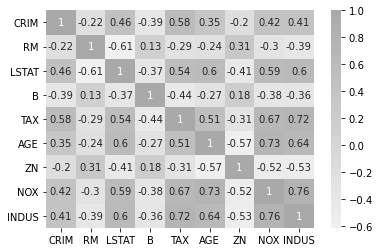

In [ ]:
## 상관행렬 시각화 해서 보기 
import seaborn as sns
import matplotlib.pyplot as plt
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(x_data2.corr(), annot=True, cmap=cmap)
plt.show()

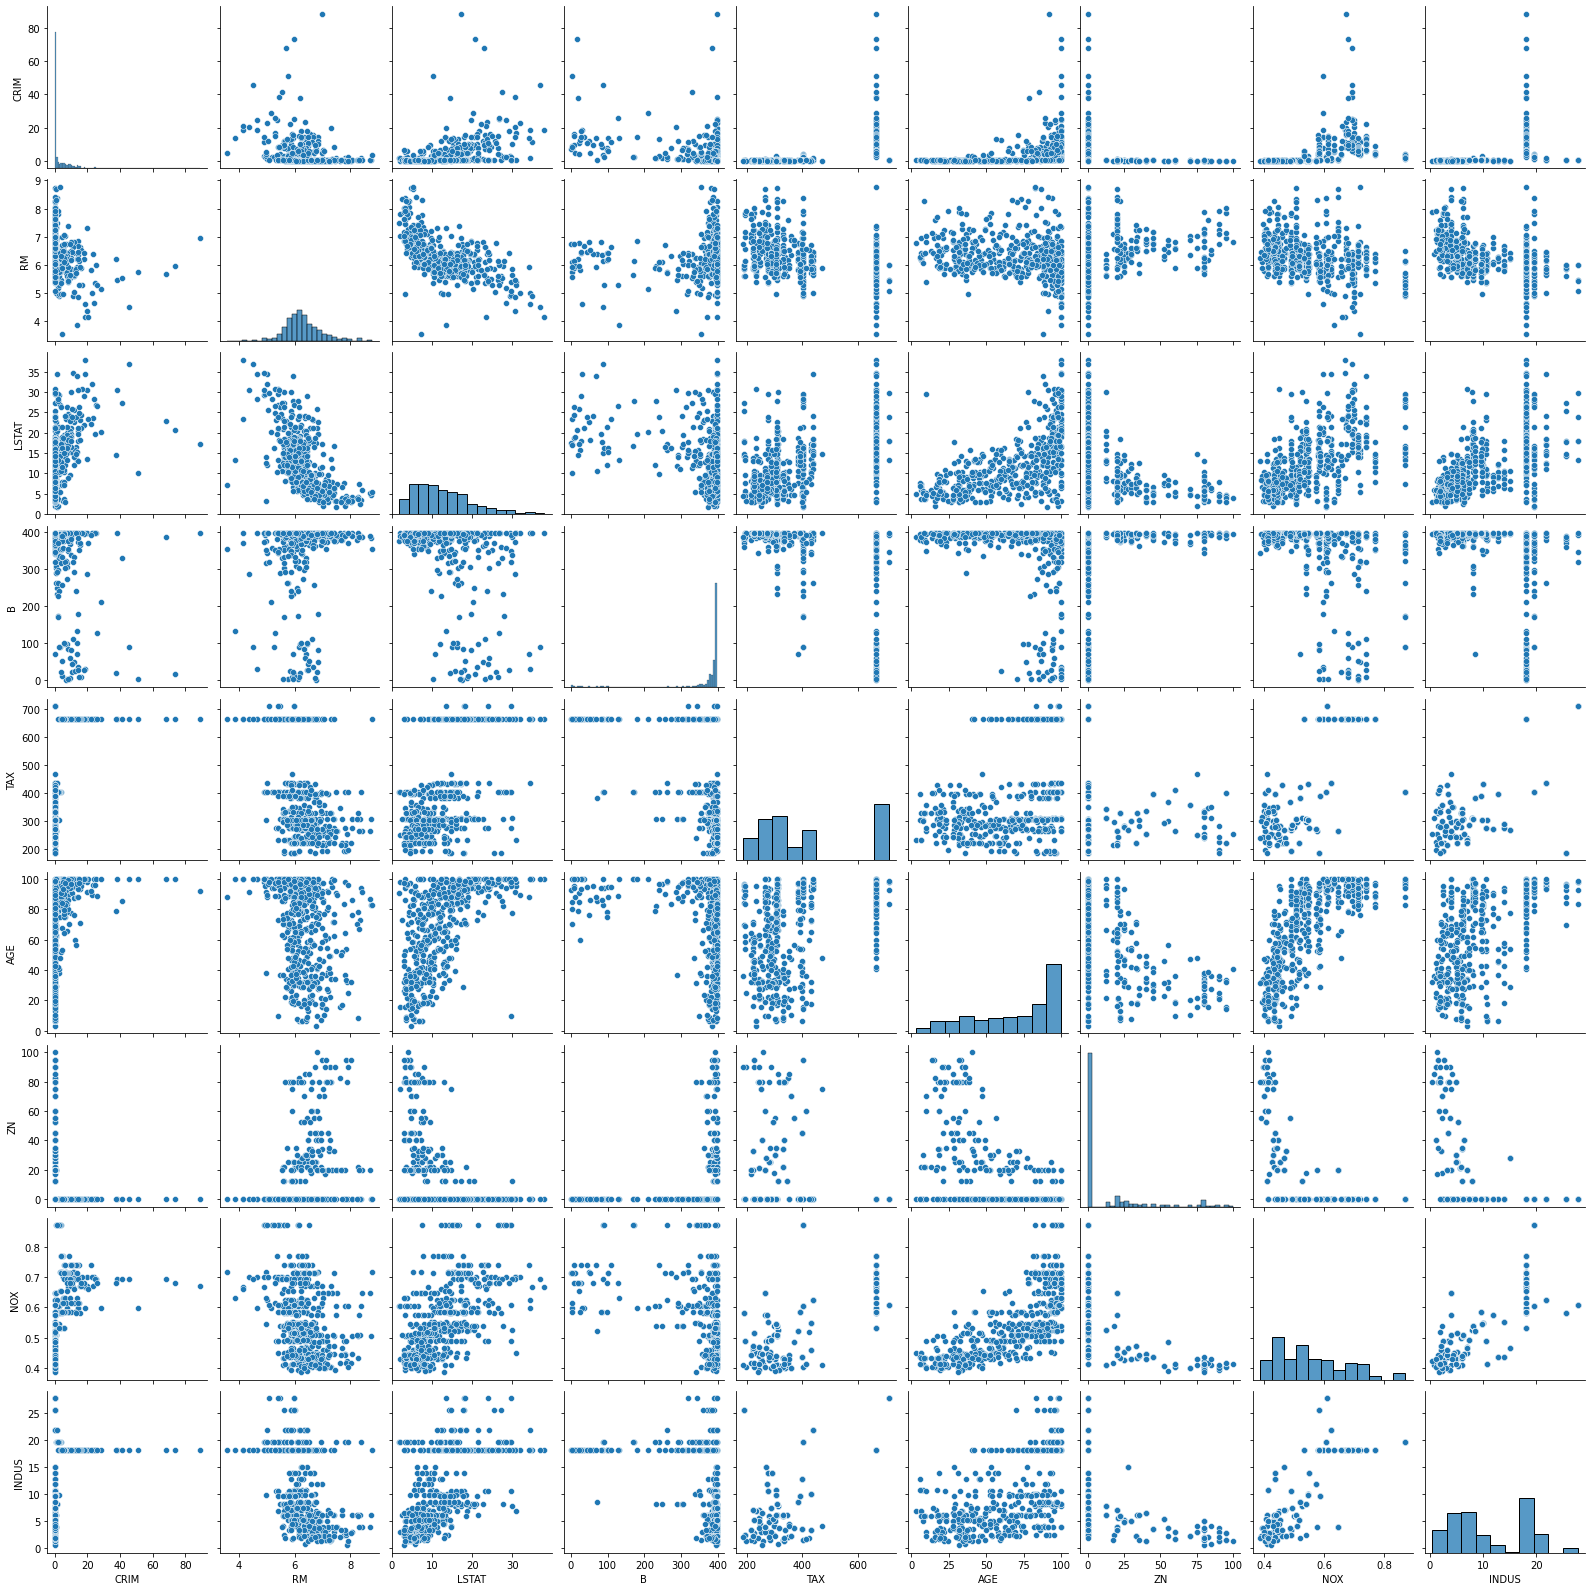

In [ ]:
## 변수별 산점도 시각화
sns.pairplot(x_data2)
plt.show()

### 다중공선성 확인 및 변수 제거 - VIF

In [ ]:
# VIF를 통한 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    x_data2.values, i) for i in range(x_data2.shape[1])]
vif["features"] = x_data2.columns
vif

,VIF Factor,features
0,1.917332,CRIM
1,46.535369,RM
2,8.844137,LSTAT
3,16.856737,B
4,19.923044,TAX
5,18.457503,AGE
6,2.086502,ZN
7,72.439753,NOX
8,12.642137,INDUS


In [ ]:
## nox 변수 제거후(X_data3) VIF 확인 
vif = pd.DataFrame()
x_data3= x_data2.drop('NOX',axis=1)
vif["VIF Factor"] = [variance_inflation_factor(
    x_data3.values, i) for i in range(x_data3.shape[1])]
vif["features"] = x_data3.columns
vif

,VIF Factor,features
0,1.916648,CRIM
1,30.806301,RM
2,8.171214,LSTAT
3,16.735751,B
4,18.727105,TAX
5,16.339792,AGE
6,2.074500,ZN
7,11.217461,INDUS


> VIF 활용해서 변수 제거했으면, <br>
> **1) 이제 MSE 등의 지표를 활용해 모델의 성능이 높아졌는지 확인하고** <br>
> **2) 잔차분석(독립성,정규성,등분산성)을 통해 모델이 적합한지 확인해야 한다.**

# Feature Selection

In [ ]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# read data
corolla = pd.read_csv('/Users/jihun/Desktop/Fastcampus/Data/ToyotaCorolla.csv')

# one-hot-encoding 'Fuel_Type'
mlr_data = pd.get_dummies(corolla, columns=['Fuel_Type'])
# rename column
mlr_data.rename(columns = {'Fuel_Type_CNG': 'CNG', 'Fuel_Type_Diesel': 'Diesel', 'Fuel_Type_Petrol': 'Petrol'}, inplace=True)
# dropping 'id' and 'model'
mlr_data.drop(['Id', 'Model'], axis=1, inplace=True)
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,CNG,Diesel,Petrol
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
# bias 추가
mlr_data = sm.add_constant(mlr_data, has_constant='add')

# train test split
feature_columns = list(mlr_data.columns.difference(['Price']))

X = mlr_data[feature_columns]
y = mlr_data.Price   # same as mlr_data['Price']
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

# modelling and fitting
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

(1005, 37) (431, 37) (1005,) (431,)


/Users/jihun/miniforge3/envs/env1/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### best AIC를 갖는 feature_combo 찾기

In [ ]:
# 1) X, y, feature를 받았을 때 AIC를 return하는 함수 정의
def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)]) # modelling
    regr = model.fit()                      # fitting
    AIC = regr.aic                          # model's aic
    return {"model": regr, "AIC": AIC}
    
print(processSubset(X=train_x, y=train_y, feature_set=feature_columns[0:5]))
print(processSubset(X=train_x, y=train_y, feature_set=feature_columns))


{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x157586610>, 'AIC': 19131.04496076453}
{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x161e3ad30>, 'AIC': 16971.191781938935}


In [ ]:
# 2) 각각의 feature_columns 조합 중 가장 낮은 AIC를 가지는 모델 선택 및 저장하는 함수 정의

import time
import itertools

def getBest(X, y, k):
    tic = time.time() # 시작시간
    results = []  # 결과 저장 공간
    for combo in itertools.combinations(X.columns.difference(['const']), k):
        combo = (list(combo) + ['const'])  # 상수열은 빼고 combo 만든 다음에, 다시 상수항을 콤보에 추가해준다. 왜냐면 상수항은 모든 콤보에 포함되어야 하기 때문
        results.append(processSubset(X, y, feature_set=combo)) # 콤보 리스트를 feature set로 갖는 모델의 AIC값을 저장한다.
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    best_model = models.loc[models['AIC'].argmin()]
        # models['AIC'].argmin() 은 AIC가 가장 낮은 행의 index를 가짐
        # models.loc[위의 인덱스] 를 하면 best 행만 return
    toc = time.time()   # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic), "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y, k=2))

Processed  630 models on 2 predictors in 0.20920085906982422 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17580.057404
Name: 211, dtype: object


In [ ]:
# 3) 변수 선택에 따른 학습시간 출력 & 모델 저장
models = pd.DataFrame(columns=['AIC', 'model'])
tic = time.time()
for i in range(1,5):
    models.loc[i] = getBest(X=train_x, y=train_y, k=i)
toc = time.time()
print("Total elapsed time:", (toc - tic), "seconds.")

Processed  36 models on 1 predictors in 0.012030839920043945 seconds.
Processed  630 models on 2 predictors in 0.18986129760742188 seconds.
Processed  7140 models on 3 predictors in 2.544981002807617 seconds.
Processed  58905 models on 4 predictors in 21.379449129104614 seconds.
Total elapsed time: 24.662523984909058 seconds.


In [ ]:
models

,AIC,model
1,17859.112070,<statsmodels.regression.linear_model.Regressio...
2,17580.057404,<statsmodels.regression.linear_model.Regressio...
3,17377.070852,<statsmodels.regression.linear_model.Regressio...
4,17193.032790,<statsmodels.regression.linear_model.Regressio...


In [ ]:
# summary로 모델 성능지표 확인
models.loc[4, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1826.
Date:                Wed, 28 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:02:50   Log-Likelihood:                -8591.5
No. Observations:                1005   AIC:                         1.719e+04
Df Residuals:                    1000   BIC:                         1.722e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Automatic_airco  2884.7258    202.292     14.260      0.000    2487.761    3281.691
KM                 -0.0220      0.001    -17.057      0.000      -0.025      -0.019
Mfg_Year         1342.0111     35.605     37.691      0.000    1272.141    1411.881
Weight             16.3245      0.902     18.093      0.000      14.554      18.095
const           -2.689e+06   7.08e+04    -37.981      0.000   -2.83e+06   -2.55e+06
==============================================================================
Omnibus:                      254.254   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2391.679
Skew:                          -0.877   Prob(JB):                         0.00
Kurtosis:                      10.351   Cond. No.                     1.40e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'BIC')

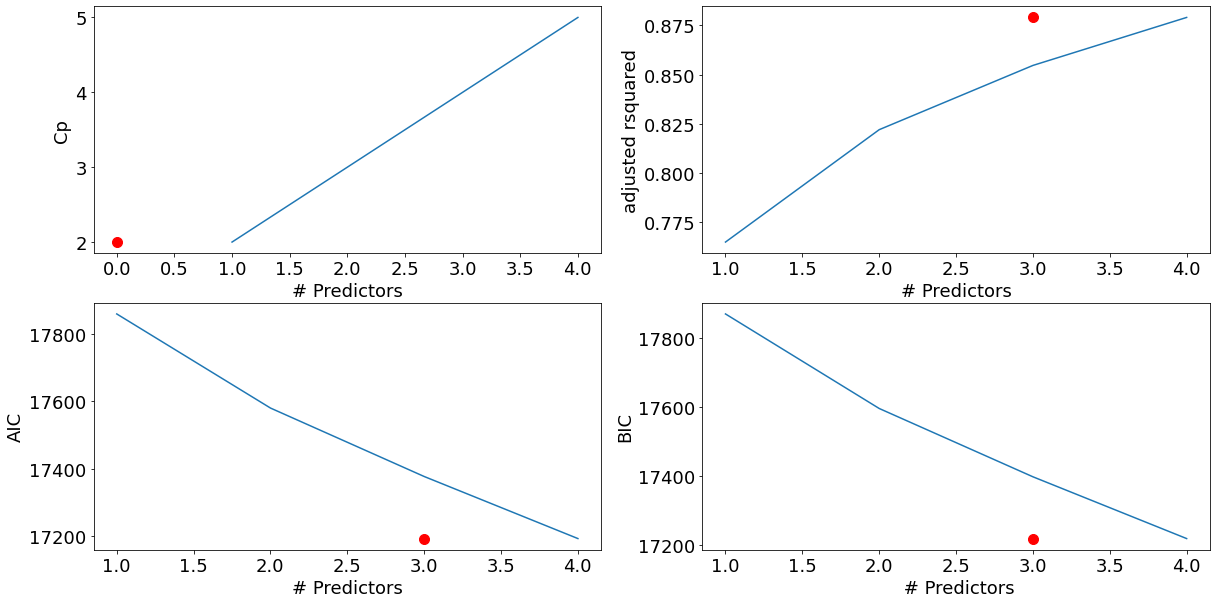

In [ ]:
# example... Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

### 전진선택법 (forward selection)

In [ ]:
# 1) 전진선택법을 위한 함수 정의

def forward(X, y, predictors):
    # 데이터 변수들이 미리 정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
        # 상수항을 뺀 X의 모든 칼럼들 중 'predictors'라는 리스트에
            # 없는 칼럼들을 모두 'remainig_predictors'라는 리스트에 넣는다.
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X, y, feature_set=predictors+[p]+['const']))
        # remaining_predictors에 있는 값들을 하나씩
        # 기존 predictors 리스트에 추가하고 상수항도 추가해서 AIC 값을 내고,
        # 그 값을 results 리스트에 추가한다.
    
    # df로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    print("Selected predictors: ", best_model['model'].model.exog_names, '\nAIC: ', best_model[0])
    return best_model

In [ ]:
# 2) 전진선택법 모델 정의

def forward_model(X, y):
    Fmodels = pd.DataFrame(columns=['AIC', 'model'])
    tic = time.time()
    
    # 변수가 10개면 10개가 될때까지 forward하기.
        # 하지만 중간에 변수가 추가되면서 AIC가 낮아지면 break
    predictors = []
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X, y, predictors=predictors)
        # Forward_result에 저장된 값은 'predictors'에 대해 best AIC model
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break  # 이번 AIC값이 이전 값보다 높으면 break
                
        Fmodels.loc[i] = Forward_result # Fmodels 행마다 'AIC','Model 저장'
        predictors = Fmodels.loc[i]["model"].model.exog_names # forward_result의 predictors(feature_columns)를 저장.
        Fmodel_before = Fmodels.loc[i]["AIC"]  # before에는 AIC값 저장
        predictors = [k for k in predictors if k != 'const']
            # predictors 리스트 내의 'const'가 아닌 모든 feature_columns를 저장
    toc = time.time()
    
    print("Total elapsed time:", (toc-tic), "seconds.")
    
    return(Fmodels['model'][len(Fmodels['model'])])
        # Fmodels의 'model' column에서 가장 마지막 인덱스를 return

In [ ]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.013676166534423828 seconds.
Selected predictors:  ['Mfg_Year', 'const'] 
AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1567455b0>
Processed  35 models on 2 predictors in 0.013959884643554688 seconds.
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'const'] 
AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x156745250>
Processed  34 models on 3 predictors in 0.012904882431030273 seconds.
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'Weight', 'const'] 
AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x154fed4f0>
Processed  33 models on 4 predictors in 0.012959003448486328 seconds.
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'const'] 
AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x156ed1490>
Processed  32 models on 5 predictors in 0.012740135192871094 seconds.
Selected predictors:  [

In [ ]:
Forward_best_model.aic

16950.384873541625

In [ ]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     465.1
Date:                Wed, 28 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:02:51   Log-Likelihood:                -8453.2
No. Observations:                1005   AIC:                         1.695e+04
Df Residuals:                     983   BIC:                         1.706e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1320.7386     39.383     33.536      0.000    1243.454    1398.023
Automatic_airco   2491.5740    187.617     13.280      0.000    2123.398    2859.750
Weight              11.9921      1.261      9.513      0.000       9.518      14.466
KM                  -0.0169      0.001    -12.360      0.000      -0.020      -0.014
HP                  16.6817      3.499      4.767      0.000       9.815      23.549
Powered_Windows    321.8088     86.977      3.700      0.000     151.127     492.491
Quarterly_Tax       17.8947      1.940      9.222      0.000      14.087      21.702
Petrol            1757.8625    307.421      5.718      0.000    1154.587    2361.138
Guarantee_Period    61.4479     14.501      4.238      0.000      32.992      89.904
Sport_Model        331.8239     85.978      3.859      0.000     163.103     500.545
Mfr_Guarantee      232.2976     77.043      3.015      0.003      81.109     383.486
Metallic_Rim       253.1814     95.042      2.664      0.008      66.673     439.690
Tow_Bar           -206.7239     79.980     -2.585      0.010    -363.675     -49.773
Backseat_Divider  -373.9644    119.356     -3.133      0.002    -608.186    -139.743
BOVAG_Guarantee    391.6877    133.227      2.940      0.003     130.245     653.130
Airco              229.1493     90.619      2.529      0.012      51.321     406.978
ABS               -249.3994    102.353     -2.437      0.015    -450.255     -48.543
Mfg_Month           23.9265     10.783      2.219      0.027       2.766      45.087
CNG               -848.8836    385.537     -2.202      0.028   -1605.454     -92.313
CD_Player          174.5496     99.883      1.748      0.081     -21.459     370.558
Automatic          221.5154    151.233      1.465      0.143     -75.262     518.293
const            -2.648e+06   7.85e+04    -33.744      0.000    -2.8e+06   -2.49e+06
==============================================================================
Omnibus:                      135.570   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1476.132
Skew:                          -0.095   Prob(JB):                         0.00
Kurtosis:                       8.934   Cond. No.                     1.76e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 후진소거법(Backward Elimination)

In [ ]:
# 1) 후진소거법 함수 정의

def backward(X, y, predictors):
    tic = time.time()
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X, y, feature_set=list(combo)+['const']))
        # processSubset은.. AIC값을 return하는 함수
    # df 변환
    models = pd.DataFrame(results)
    # 가장 낮은 AIC의 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [ ]:
# 2) 후진소거법 모델 정의

def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=['AIC', 'model'], index = range(1, len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X, y, predictors)['AIC']
    # 모든 features를 넣었을 때의 초기 AIC값 = Bmodel_before
    
    while (len(predictors) > 1):
        Backward_result = backward(X, y, predictors=predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]['model'].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [k for k in predictors if k != 'const']
            
    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [ ]:
Backward_best_model = backward_model(train_x, train_y)

Processed  36 models on 35 predictors in 0.10695195198059082
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x15744c9a0>
Processed  35 models on 34 predictors in 0.09445929527282715
Selected predictors: ['ABS', 'Age_08_04', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year',

In [ ]:
Backward_best_model.aic

16950.384873541672

In [ ]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     465.1
Date:                Wed, 28 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:02:52   Log-Likelihood:                -8453.2
No. Observations:                1005   AIC:                         1.695e+04
Df Residuals:                     983   BIC:                         1.706e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -249.3994    102.353     -2.437      0.015    -450.255     -48.543
Age_08_04          -23.9265     10.783     -2.219      0.027     -45.087      -2.766
Airco              229.1493     90.619      2.529      0.012      51.321     406.978
Automatic          221.5154    151.233      1.465      0.143     -75.262     518.293
Automatic_airco   2491.5740    187.617     13.280      0.000    2123.398    2859.750
BOVAG_Guarantee    391.6877    133.227      2.940      0.003     130.245     653.130
Backseat_Divider  -373.9644    119.356     -3.133      0.002    -608.186    -139.743
CD_Player          174.5496     99.883      1.748      0.081     -21.459     370.558
CNG              -2606.7460    408.529     -6.381      0.000   -3408.436   -1805.056
Cylinders        -4.871e+05   6.12e+04     -7.957      0.000   -6.07e+05   -3.67e+05
Diesel           -1757.8625    307.421     -5.718      0.000   -2361.138   -1154.587
Guarantee_Period    61.4479     14.501      4.238      0.000      32.992      89.904
HP                  16.6817      3.499      4.767      0.000       9.815      23.549
KM                  -0.0169      0.001    -12.360      0.000      -0.020      -0.014
Metallic_Rim       253.1814     95.042      2.664      0.008      66.673     439.690
Mfg_Year          1033.6210    129.903      7.957      0.000     778.702    1288.540
Mfr_Guarantee      232.2976     77.043      3.015      0.003      81.109     383.486
Powered_Windows    321.8088     86.977      3.700      0.000     151.127     492.491
Quarterly_Tax       17.8947      1.940      9.222      0.000      14.087      21.702
Sport_Model        331.8239     85.978      3.859      0.000     163.103     500.545
Tow_Bar           -206.7239     79.980     -2.585      0.010    -363.675     -49.773
Weight              11.9921      1.261      9.513      0.000       9.518      14.466
const            -1.218e+05   1.53e+04     -7.957      0.000   -1.52e+05   -9.17e+04
==============================================================================
Omnibus:                      135.570   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1476.132
Skew:                          -0.095   Prob(JB):                         0.00
Kurtosis:                       8.934   Cond. No.                     2.34e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 단계적 선택법(Stepwise)

In [ ]:
def Stepwise_model(X, y):
    Stepmodels = pd.DataFrame(columns=['AIC', 'model'])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X, y, predictors + ['const'])['AIC']
    
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X, y, predictors=predictors)
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [ ]:
Stepwise_best_model = Stepwise_model(train_x, train_y)

Processed  36 models on 1 predictors in 0.014001846313476562 seconds.
Selected predictors:  ['Mfg_Year', 'const'] 
AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x156db1730>
forward
Processed  1 models on 0 predictors in 0.0007228851318359375
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1568bde80>
Processed  35 models on 2 predictors in 0.016681194305419922 seconds.
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'const'] 
AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1571ac610>
forward
Processed  2 models on 1 predictors in 0.0016989707946777344
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x15736ddc0>
Processed  34 models on 3 predictors in 0.01617717742919922 seconds.
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'Weight', 'const'] 
AIC:  <statsmodels.regression.li

Processed  16 models on 15 predictors in 0.024318933486938477
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Sport_Model', 'Mfr_Guarantee', 'Tow_Bar', 'Backseat_Divider', 'BOVAG_Guarantee', 'Airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x156db1040>
Processed  20 models on 17 predictors in 0.03619217872619629 seconds.
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Sport_Model', 'Mfr_Guarantee', 'Metallic_Rim', 'Tow_Bar', 'Backseat_Divider', 'BOVAG_Guarantee', 'Airco', 'ABS', 'const'] 
AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x15744c3a0>
forward
Processed  17 models on 16 predictors in 0.021541118621826172
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Quarterly_Tax'

Processed  22 models on 21 predictors in 0.04600977897644043
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Sport_Model', 'Mfr_Guarantee', 'Metallic_Rim', 'Tow_Bar', 'Backseat_Divider', 'BOVAG_Guarantee', 'Airco', 'ABS', 'Mfg_Month', 'CNG', 'CD_Player', 'Automatic', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x156db1a60>
backward
Processed  15 models on 22 predictors in 0.03188896179199219 seconds.
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Sport_Model', 'Mfr_Guarantee', 'Metallic_Rim', 'Tow_Bar', 'Backseat_Divider', 'BOVAG_Guarantee', 'Airco', 'ABS', 'Mfg_Month', 'CNG', 'CD_Player', 'Automatic', 'Age_08_04', 'const'] 
AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x154cf5a00>
forward
Processed  22 models on 21 predicto

Processed  15 models on 22 predictors in 0.04226207733154297 seconds.
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Sport_Model', 'Mfr_Guarantee', 'Metallic_Rim', 'Tow_Bar', 'Backseat_Divider', 'BOVAG_Guarantee', 'Airco', 'ABS', 'Mfg_Month', 'CNG', 'CD_Player', 'Automatic', 'Age_08_04', 'const'] 
AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x15707d0d0>
forward
Processed  22 models on 21 predictors in 0.02757406234741211
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Sport_Model', 'Mfr_Guarantee', 'Metallic_Rim', 'Tow_Bar', 'Backseat_Divider', 'BOVAG_Guarantee', 'Airco', 'ABS', 'Mfg_Month', 'CNG', 'CD_Player', 'Automatic', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1568bd340>
backward
Processed  15 models on 22 predicto

In [ ]:
Stepwise_best_model.aic

16950.384873541625

### 모델 성능평가 및 적합성 검증

In [ ]:
# the number of features used
print(fitted_full_model.params.shape,
      Forward_best_model.params.shape,
      Backward_best_model.params.shape,
      Stepwise_best_model.params.shape)
    # 비슷한 성능이면 param 수가 적은 게 더 좋은 모델이다.

# model's y-hat
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

(37,) (22,) (23,) (22,)


In [ ]:
# performance matrix
perf_mat = pd.DataFrame(columns=['ALL', 'FORWARD', 'BACKWARD', 'STEPWISE'],
                       index = ['MSE', 'RMSE', 'MAE', 'MAPE'])

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from sklearn import metrics
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

                 ALL         FORWARD        BACKWARD        STEPWISE
MSE   1302255.175419  1308454.781544  1308454.781548  1308454.781544
RMSE     1141.163956     1143.877083     1143.877083     1143.877083
MAE       857.594003      859.688346      859.688346      859.688346
MAPE        8.318591        8.341023        8.341023        8.341023


**적합성 검증 - 잔차분석**<br>
- 정규성: qqplot 잔차의 정규분포 확인
- 독립성: t-시점과 t-1시점 잔차의 산점도 분석
- 등분산성: 예측값(y-hat)에 따른 잔차의 분산 확인

/Users/jihun/miniforge3/envs/env1/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/jihun/miniforge3/envs/env1/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


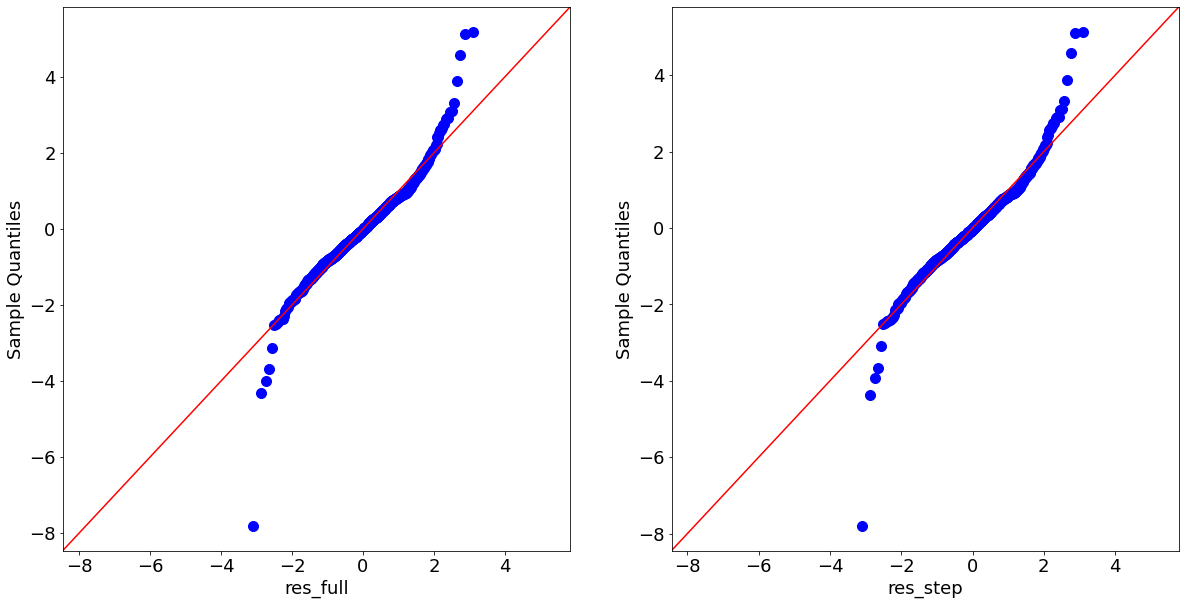

In [ ]:
# 정규성 - qq plot
import matplotlib.pyplot as plt

res_full = fitted_full_model.resid
res_step = Stepwise_best_model.resid

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
fig1 = sm.qqplot(res_full, fit=True, line='45', ax=ax1, xlabel='res_full')
fig2 = sm.qqplot(res_step, fit=True, line='45', ax=ax2, xlabel='res_step')

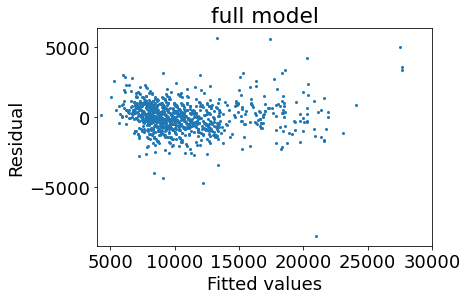

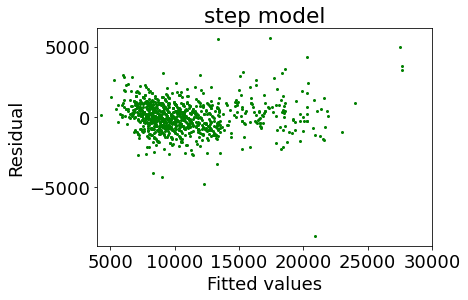

In [ ]:
# 등분산성 - y-hat~resid 산점도
    # residual pattern 확인

pred_y_full = fitted_full_model.predict(train_x)
pred_y_step = Stepwise_best_model.predict(train_x[Stepwise_best_model.model.exog_names])


ax1 = plt.subplot()
plt.scatter(pred_y_full, res_full, s=4)
plt.xlim(4000, 30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.title('full model')
plt.show()

ax2 = plt.subplot()
plt.scatter(pred_y_step, res_step, s=4, c='green')
plt.xlim(4000, 30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.title('step model')
plt.show()

In [ ]:
# 독립성은 to-research

# Logistic Regression<a id='section4'></a>

**also.. <font color='red'>Feature Selection</font>**<br>
**<font color='red'>Regression Regularization</font>**<br>
**in order to achieve better performance**<br><br>

**::NOTE**<br>
- Logistic regression은 회귀 모델이 아니라 '분류' 모델이다.
- 그래서 성능지표도 accuracy, g-mean, f1 measure 등을 사용해야 한다.
    - confusion matrix, ROC, AUC 등

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import time
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ploan = pd.read_csv('/Users/jihun/Desktop/Fastcampus/Data/Personal Loan.csv')

# 결측치 있는 행 제거 & 의미 없는 변수 제거 (ID, ZIP code)
ploan_processed = ploan.dropna().drop(['ID', 'ZIP Code'], axis=1, inplace=False)

# 상수항 추가
ploan_processed = sm.add_constant(ploan_processed, has_constant='add')

# train, test split
feature_columns = list(ploan_processed.columns.difference(['Personal Loan']))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']  # 대출여부: 1 or 0

train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, train_size=0.7, test_size=0.3, random_state=42)

ploan_processed.head()

/Users/jihun/miniforge3/envs/env1/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1


**ploan data**<br>
- Experience 경력
- Income 수입
- Famliy 가족단위
- CCAvg 월 카드사용량 
- Education 교육수준 (1: undergrad; 2, Graduate; 3; Advance)
- Mortgage 가계대출
- Securities account 유가증권계좌유무
- CD account 양도예금증서 계좌 유무
- Online 온라인계좌유무
- CreidtCard 신용카드유무

In [ ]:
# logistic modelling and fitting
logit = sm.Logit(train_y, train_x)
fitted_logit = logit.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.131055
         Iterations 9


In [ ]:
# summary
fitted_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Wed, 28 Jul 2021   Pseudo R-squ.:                  0.6030
Time:                        10:02:54   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [ ]:
# params(회귀계수)
fitted_logit.params

Age                    0.024471
CCAvg                  0.098468
CD Account             4.372577
CreditCard            -1.237447
Education              1.520329
Experience            -0.007032
Family                 0.757911
Income                 0.054695
Mortgage              -0.000133
Online                -0.440746
Securities Account    -1.852006
const                -13.920298
dtype: float64

In [ ]:
# exp
np.exp(fitted_logit.params)

## 나이가 한살 많을수록록 대출할 확률이 1.024배 높다.
## 수입이 1단위 높을소룩 대출할 확률이 1.05배 높다 
## 가족 구성원수가 1많을수록 대출할 확률이 2.13배 높다
## 경력이 1단위 높을수록 대출할 확률이 0.99배 높다(귀무가설 채택)
# Experience,  Mortgage는 제외할 필요성이 있어보임

Age                   1.024773e+00
CCAvg                 1.103479e+00
CD Account            7.924761e+01
CreditCard            2.901239e-01
Education             4.573729e+00
Experience            9.929928e-01
Family                2.133814e+00
Income                1.056218e+00
Mortgage              9.998665e-01
Online                6.435563e-01
Securities Account    1.569221e-01
const                 9.005163e-07
dtype: float64

### 로지스틱 모델 성능지표 확인
- confusion matrix
    - accuracy
- ROC, AUC 등

In [ ]:
# y-hat
pred_y = fitted_logit.predict(test_x)

# logit의 pred 값이 1혹은 0이 되도록 하는 함수 정의
def cut_off(y, threshold):
    Y = y.copy()  # copy함수를 사용하여 이전의 y값이 변하지 않게 함
    # Y: 0 혹은 1의 예측값,    y: 0~1 사이 실수 예측값
    Y[Y > threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))

pred_Y = cut_off(pred_y, 0.5)
pred_Y

1065    0
487     0
2157    0
1765    0
525     0
       ..
277     0
914     1
542     0
32      0
2360    0
Length: 750, dtype: int64

In [ ]:
# confusion matrix
cfmat = confusion_matrix(test_y, pred_Y)
print(cfmat)

# confusion matrix accuracy
print('accuracy:', (cfmat[0,0]+cfmat[1,1]) / len(pred_Y))

# accuracy 구하는 함수 정의
def acc(cfmat):
    acc = (cfmat[0,0] + cfmat[1,1]) / (cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])
    return acc

[[661  12]
 [ 28  49]]
accuracy: 0.9466666666666667


In [ ]:
# cut_off의 threshold에 따른 성능지표 비교
threshold = np.arange(0, 1, 0.1)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y = cut_off(pred_y, i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] = acc(cfmat)
table.index.name = 'threshold'
table.columns.name = 'performance'
table

performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.933333
0.4,0.934667
0.5,0.946667
0.6,0.949333
0.7,0.946667
0.8,0.941333


**!!! threshold에 따른 성능지표 비교 후 가장 높은 ACC 반납하는 함수 만들기**

best_cut_off
best_threshold_acc
pred_y_full을 받으면
threshold 0.1~0.9까지로 cut_off를 돌리고
cut_off로 나온 pred_Y_full과 test_y의 cfmat를 만들고
cfmat의 acc를 저장한다.
0.9까지 다 돌리면 "가장 높은 acc 값"과 "사용한 threshold"를 반환한다.


In [ ]:

def cut_off(y, threshold):
    Y = y.copy()  # copy함수를 사용하여 이전의 y값이 변하지 않게 함
    # Y: 0 혹은 1의 예측값,    y: 0~1 사이 실수 예측값
    Y[Y > threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))


def acc(cfmat):
    acc = (cfmat[0,0] + cfmat[1,1]) / (cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])
    return acc



threshold = np.arange(0, 1, 0.1)
table = pd.DataFrame(columns=['ACC'])
result = []
for i in threshold:
    pred_Y = cut_off(pred_y, i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] = acc(cfmat)
table.index.name = 'threshold'
table.columns.name = 'performance'
table


performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.933333
0.4,0.934667
0.5,0.946667
0.6,0.949333
0.7,0.946667
0.8,0.941333


In [ ]:
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

AUC: 0.9463923891858513


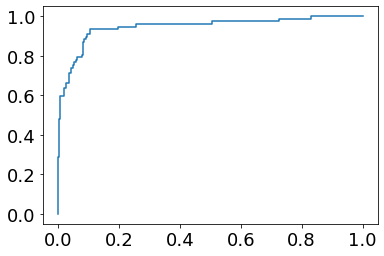

In [ ]:
# sklearn ROC 패키지
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)

# print ROC curve
plt.plot(fpr, tpr)

# print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

### Feature Selection again & 성능 측정
- 특이하게.. 로지스틱 회귀모형은 cut_off 함수를 지나기 전엔 '회귀' 값을 갖는다.
- 그러니까 변수선택법을 통해 regression 값의 AIC를 최대한 높이고,
- 그 후에 cut_off 함수를 지나게 해본다.

In [ ]:
# 위 섹션에 정의된 함수 그대로 사용
    # !!processSubset에서 model만 logit으로 변경!!

def processSubset(X,y, feature_set):
            model = sm.Logit(y,X[list(feature_set)])
            regr = model.fit()
            AIC = regr.aic
            return {"model":regr, "AIC":AIC}
        
'''
전진선택법
'''
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])


'''
후진소거법
'''
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model


def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])


'''
단계적 선택법
'''
def stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [ ]:
Forward_best_model = forward_model(train_x, train_y)
Backward_best_model = backward_model(train_x, train_y)
stepwise_best_model = stepwise_model(train_x, train_y)

# y-hat
pred_y_full = fitted_logit.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = stepwise_best_model.predict(test_x[stepwise_best_model.model.exog_names])

Optimization terminated successfully.
         Current function value: 0.329986
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.284217
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296731
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.330062
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.322763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.329995
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.327824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.205738
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324953
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.329912
  

Optimization terminated successfully.
         Current function value: 0.131061
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.214795
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.142500
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131057
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.154241
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.135440
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.152443
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131753
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131072
         Iterations 9
Processed  11 models on 10 predictors in 0.040788888931274414
Selected predictors:

Processed  8 models on 4 predictors in 0.019475936889648438
Selected predictors: ['Income', 'Education', 'CD Account', 'Family', 'const']  AIC: <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x1573dd1f0>
forward
Optimization terminated successfully.
         Current function value: 0.152041
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.154924
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.164270
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.287431
         Iterations 7
Processed  4 models on 3 predictors in 0.009469032287597656
Selected predictors: ['Income', 'Education', 'CD Account', 'const']  AIC: <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x157552f10>
Optimization terminated successfully.
         Current function value: 0.138887
         Iterations 9
Optimization terminated successfully.
    

Optimization terminated successfully.
         Current function value: 0.131871
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.134831
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.135444
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.142684
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.152482
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.155797
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.218281
         Iterations 8
Processed  9 models on 8 predictors in 0.033705949783325195
Selected predictors: ['Income', 'Education', 'CD Account', 'Family', 'CreditCard', 'Securities Account', 'Online', 'CCAvg', 'const']  AIC: <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x1573e3fd0>
Optimi

In [ ]:
# cut_off 함수 적용
pred_Y_full = cut_off(pred_y_full, 0.5)
pred_Y_forward = cut_off(pred_y_forward, 0.5)
pred_Y_backward = cut_off(pred_y_backward, 0.5)
pred_Y_stepwise = cut_off(pred_y_stepwise, 0.5)

In [ ]:
# cfmat 만들기
cfmat_full = confusion_matrix(test_y, pred_Y_full)
cfmat_forward = confusion_matrix(test_y, pred_Y_forward)
cfmat_backward = confusion_matrix(test_y, pred_Y_backward)
cfmat_stepwise = confusion_matrix(test_y, pred_Y_stepwise)

In [ ]:
# acc 함수 사용하기
print(acc(cfmat_full))
print(acc(cfmat_forward))
print(acc(cfmat_backward))
print(acc(cfmat_stepwise))

## 추가로 ROC curve와 AUC도 구하면 됌.
    ## 결론: 이 데이터에서 변수선택법을 사용해도 logit regression의 성능이 큰 차이가 없음.

0.9466666666666667
0.944
0.944
0.944


# Regression Regularization<a id='section5'></a>

#### Lasso & Ridge
- 회귀계수축소법으로 위의 logit regression 성능이 증가할까?

In [ ]:
# Lasso modelling and fitting
ll = Lasso(alpha=0.01)
ll.fit(train_x, train_y)

# 회귀계수 출력
ll.coef_
    # 실제로는 쓸모 없는 변수가 살아남기도 하고,
    # p value가 낮았던 변수의 회귀계수가 0에 가까워지기도 한다.

array([ 0.00000000e+00,  2.04783983e-03,  1.14390390e-01, -0.00000000e+00,
        6.58342418e-02,  4.76625359e-04,  3.13396711e-02,  3.55393865e-03,
        1.31719530e-05,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00])

In [ ]:
# 기존 모델의 summary와 비교
fitted_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Wed, 28 Jul 2021   Pseudo R-squ.:                  0.6030
Time:                        10:02:55   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

Lasso accuracy: 0.936
Lasso AUC: 0.9439995368672931


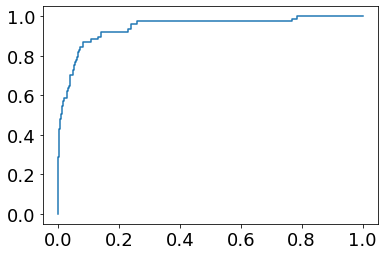

In [ ]:
# y-hat, confusion_matrix, acc 계산
pred_y_lasso = ll.predict(test_x)
pred_Y_lasso = cut_off(pred_y_lasso, 0.5)

cfmat = confusion_matrix(test_y, pred_Y_lasso)
print('Lasso accuracy:', acc(cfmat))

# ROC curve와 AUC 구하기
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_lasso, pos_label=1)
plt.plot(fpr,tpr)

auc = np.trapz(tpr,fpr)
print('Lasso AUC:', auc)

In [ ]:
# Ridge modelling and fitting
rr = Ridge(alpha=0.01)
rr.fit(train_x, train_y)

# 회귀계수 출력
print('rr coef:', rr.coef_)

# lasso 회귀계수와 비교
print('\nll coef:', ll.coef_)

rr coef: [-3.71283678e-03  7.37570775e-03  3.54973975e-01 -5.28579506e-02
  7.83404224e-02  4.12823466e-03  3.62504712e-02  3.27385112e-03
  1.73105480e-06 -1.91297381e-02 -8.77388670e-02  0.00000000e+00]

ll coef: [ 0.00000000e+00  2.04783983e-03  1.14390390e-01 -0.00000000e+00
  6.58342418e-02  4.76625359e-04  3.13396711e-02  3.55393865e-03
  1.31719530e-05  0.00000000e+00 -0.00000000e+00  0.00000000e+00]


Ridge accuracy: 0.932
Ridge AUC: 0.9494992377607533


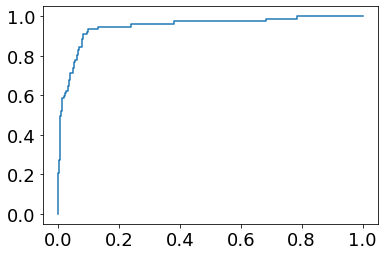

In [ ]:
# y-hat, confusion_matrix, acc 계산
pred_y_ridge = rr.predict(test_x)
pred_Y_ridge = cut_off(pred_y_ridge, 0.5)

cfmat = confusion_matrix(test_y, pred_Y_ridge)
print('Ridge accuracy:', acc(cfmat))

# ROC curve와 AUC 구하기
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_ridge, pos_label=1)
plt.plot(fpr,tpr)

auc = np.trapz(tpr,fpr)
print('Ridge AUC:', auc)

In [ ]:
# lambda 값에 따른 회귀계수 / accuracy 계산
    # lambda는 0.001 ~ 10 까지 범위 설정
alpha = np.logspace(-3, 1, 5)

data = []
acc_table = []
for i, a in enumerate(alpha):   # enumerate는 (0, 0.001), (1, 0.01) ... 이런 식으로 (index, value) 처럼 인덱스를 넣어주는 역할
            # !!! 근데 여기서 enumerate 안해도 함수 작동되는데 왜 했지?
    lasso = Lasso(alpha=a).fit(train_x, train_y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))
        # np.hstack를 하면 nparray(intercept, weight1, weight2, ... weight 12)  가 되고 pd.Series 하면 인덱스가 추가된 series가 된다.
        # 이걸 data에 넣으면 0번 index에 intercept, 1~12번 index에는 각 feature마다의 weight가 입력된다.
    pred_y = lasso.predict(test_x)
    pred_y = cut_off(pred_y, 0.5)
    cfmat = confusion_matrix(test_y, pred_y)
    acc_table.append((acc(cfmat)))

df_lasso = pd.DataFrame(data, index=alpha)  
df_lasso
acc_table_lasso = pd.DataFrame(ac_table, index=alpha).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0.001,-0.335006,-0.002109,0.006829,0.322174,-0.043385,0.076771,0.002534,0.035728,0.003313,0.000004,-0.012241,-0.067973,0.0
0.010,-0.381869,0.000000,0.002048,0.114390,-0.000000,0.065834,0.000477,0.031340,0.003554,0.000013,0.000000,-0.000000,0.0
0.100,-0.143698,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.003291,0.000016,0.000000,0.000000,0.0
1.000,-0.113103,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.002893,0.000000,0.000000,0.000000,0.0
10.000,0.102286,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


### >>> 위의 함수 이해하기

In [ ]:
np.hstack([Lasso(alpha=0.001).fit(train_x, train_y).intercept_, Lasso(alpha=0.001).fit(train_x, train_y).coef_])
    # 1번째가 intercept, 나머지는 coef
    # np.hstack은 두 array를 하나의 array로 합쳐줌

array([-3.35006214e-01, -2.10901528e-03,  6.82879976e-03,  3.22173898e-01,
       -4.33853936e-02,  7.67713084e-02,  2.53391114e-03,  3.57275508e-02,
        3.31264798e-03,  4.02848840e-06, -1.22410861e-02, -6.79726213e-02,
        0.00000000e+00])

In [ ]:
# series로 만들기
pd.Series(np.hstack([Lasso(alpha=0.001).fit(train_x, train_y).intercept_, Lasso(alpha=0.001).fit(train_x, train_y).coef_]))

0    -0.335006
1    -0.002109
2     0.006829
3     0.322174
4    -0.043385
5     0.076771
6     0.002534
7     0.035728
8     0.003313
9     0.000004
10   -0.012241
11   -0.067973
12    0.000000
dtype: float64

In [ ]:
# series 두 개를 data1=[]에 합치기
data1 = []
s1 = pd.Series(np.hstack([Lasso(alpha=0.001).fit(train_x, train_y).intercept_, Lasso(alpha=0.001).fit(train_x, train_y).coef_]))
s2 = pd.Series(np.hstack([Lasso(alpha=0.01).fit(train_x, train_y).coef_, Lasso(alpha=0.01).fit(train_x, train_y).intercept_]))

In [ ]:
data1.append(s1)

In [ ]:
data1.append(s2)

In [ ]:
data1

[0    -0.335006
 1    -0.002109
 2     0.006829
 3     0.322174
 4    -0.043385
 5     0.076771
 6     0.002534
 7     0.035728
 8     0.003313
 9     0.000004
 10   -0.012241
 11   -0.067973
 12    0.000000
 dtype: float64,
 0     0.000000
 1     0.002048
 2     0.114390
 3    -0.000000
 4     0.065834
 5     0.000477
 6     0.031340
 7     0.003554
 8     0.000013
 9     0.000000
 10   -0.000000
 11    0.000000
 12   -0.381869
 dtype: float64]

In [ ]:
# 위에는 intercept랑 coef 저장하는 'data1'을 만들어놓은 거고.. 이건 type(data1) = list.. 즉, series를 원소로 갖는 list다.

# 다음으로 acc값을 저장하는 acc_table을 만들면..
acc_table = []
pred_y1 = Lasso(alpha=0.001).fit(train_x, train_y).predict(test_x)
pred_y1 = cut_off(pred_y1, 0.5)
cfmat = confusion_matrix(test_y, pred_y1)
acc_table.append((acc(cfmat)))

pred_y2 = Lasso(alpha=0.01).fit(train_x, train_y).predict(test_x)
pred_y2 = cut_off(pred_y2, 0.5)
cfmat = confusion_matrix(test_y, pred_y2)
acc_table.append((acc(cfmat)))

In [ ]:
acc_table
# pred_y1 의 accuracy와 pred_y2의 accuracy가 저장된 list

[0.932, 0.936]

In [ ]:
# 이제 data1과 acc_table이라는 두 리스트를 dataframe으로 만들자.

df_lasso1 = pd.DataFrame(data1, index=['0.001', '0.01'])
df_lasso1
# 인덱스를 0.001, 0.01 같은 alpha값으로 주면 기존 series의 인덱스는 각각 값의 칼럼이 된다.


,0,1,2,3,4,5,6,7,8,9,10,11,12
0.001,-0.335006,-0.002109,0.006829,0.322174,-0.043385,0.076771,0.002534,0.035728,0.003313,0.000004,-0.012241,-0.067973,0.000000
0.01,0.000000,0.002048,0.114390,-0.000000,0.065834,0.000477,0.031340,0.003554,0.000013,0.000000,-0.000000,0.000000,-0.381869


In [ ]:
# 근데 보기 더 편하게 transpose해준다.
df_lasso1.T

,0.001,0.01
0,-0.335006,0.000000
1,-0.002109,0.002048
2,0.006829,0.114390
3,0.322174,-0.000000
4,-0.043385,0.065834
5,0.076771,0.000477
6,0.002534,0.031340
7,0.035728,0.003554
8,0.003313,0.000013
9,0.000004,0.000000


In [ ]:
# acc_table도 똑같다.
acc_table_lasso1 = pd.DataFrame(acc_table, index=['0.001', '0.01']).T
acc_table_lasso1

,0.001,0.01
0,0.932,0.936


In [ ]:
## +⍺ Ridge lambda값 변화에 따른 coef, intercept, acc 변화
data = []
acc_table = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(train_x, train_y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))
    pred_y = ridge.predict(test_x)
    pred_y = cut_off(pred_y, 0.5)
    cfmat = confusion_matrix(test_y, pred_y)
    acc_table.append((acc(cfmat)))
    
df_ridge = pd.DataFrame(data, index=alpha).T
acc_table_ridge = pd.DataFrame(acc_table, index=alpha).T

In [ ]:
df_ridge

,0.001,0.010,0.100,1.000,10.000
0,-0.289557,-0.289565,-0.289645,-0.290438,-0.297581
1,-0.003713,-0.003713,-0.003713,-0.003716,-0.003723
2,0.007376,0.007376,0.007376,0.007378,0.007388
3,0.355019,0.354974,0.354529,0.350141,0.311781
4,-0.052866,-0.052858,-0.052782,-0.052037,-0.045541
5,0.078340,0.078340,0.078341,0.078347,0.078316
6,0.004128,0.004128,0.004129,0.004136,0.004175
7,0.036250,0.036250,0.036254,0.036289,0.036578
8,0.003274,0.003274,0.003274,0.003278,0.003313
9,0.000002,0.000002,0.000002,0.000002,0.000004


In [ ]:
acc_table_ridge

,0.001,0.010,0.100,1.000,10.000
0,0.932,0.932,0.932,0.932,0.932


### lambda 값의 변화에 따른 회귀계수 축소 시각화

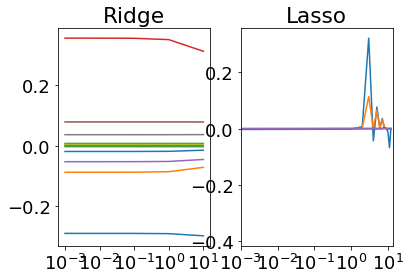

In [ ]:
import matplotlib.pyplot as plt
ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha)
plt.title("Ridge")

ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha)
plt.title("Lasso")

plt.show()

# PCA<a id='section6'></a>

### 데이터 전처리 및 EDA

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
keys = iris.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


```python
# dataset 확인 방법 예시
print('\n feature_names 의 type:',type(iris_data.feature_names))
print(' feature_names 의 shape:',len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names 의 type:',type(iris_data.target_names))
print(' feature_names 의 shape:',len(iris_data.target_names))
print(iris_data.target_names)

print('\n data 의 type:',type(iris_data.data))
print(' data 의 shape:',iris_data.data.shape)
print(iris_data['data'])

print('\n target 의 type:',type(iris_data.target))
print(' target 의 shape:',iris_data.target.shape)
print(iris_data.target)
```

In [ ]:
# 독립변수 중 0열과 2열의 두 개만 사용한다면..
X = iris.data[:, [0,2]]
y = iris.target

In [ ]:
print(X.shape)
feature_names = [iris.feature_names[0], iris.feature_names[2]]
df_X = pd.DataFrame(X)
df_X.head()

(150, 2)


,0,1
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [ ]:
print(y.shape)
df_y = pd.DataFrame(y)
df_y.head()

(150,)


,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
# 결측치 여부 파악
print(df_X.isnull().sum())
print(df_y.isnull().sum())

# 종속변수 파악
print(set(y))
print(iris.target_names)

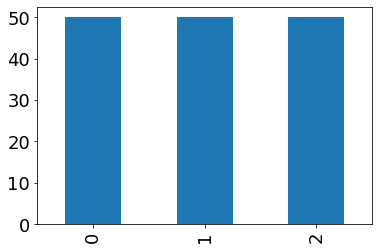

In [ ]:
# 종속변수 분포
df_y[0].value_counts().plot(kind='bar')
plt.show()

/Users/jihun/miniforge3/envs/env1/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


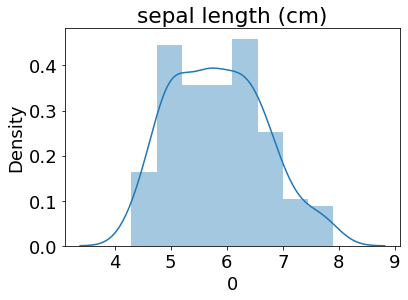

/Users/jihun/miniforge3/envs/env1/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


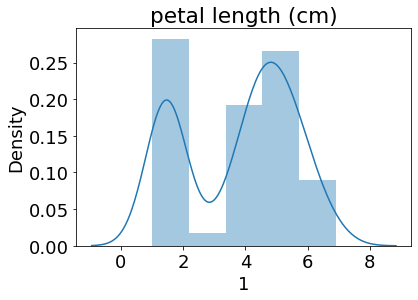

In [ ]:
# 독립변수 분포
for i in range(df_X.shape[1]):
    sns.distplot(df_X[i])
    plt.title(feature_names[i])
    plt.show()

### PCA 함수 사용
- PCA는 차원축소 기법.
- 비지도학습  ->
    - e.g.) 2개의 x 변수를 성분2개로 표현하거나, 성분1개로 표현한다.
    - 첫 번째 성분은 가장 분산이 큰 방향의 축, 두 번째는 두 번째로 분산이 큰 방향의 축
    
>대부분 실무에서 분석하는 데이터는 매우 많은 특성(feature)들을 가지고 있다. 이러한 데이터를 가지고 머신러닝 알고리즘을 적용해 문제를 해결하려고 한다면, 데이터의 차원이 크기 때문에 학습 속도가 느릴 뿐만아니라 성능 또한 좋지 않을 가능성이 크다.

<img src='https://t1.daumcdn.net/cfile/tistory/990B83345A75B1ED31'>

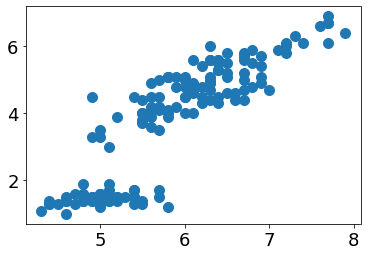

In [ ]:
# x 변수간 산점도
plt.scatter(X[:,0], X[:,1])

In [ ]:
# pca 함수를 이용해 주성분 2개 만들기
pca = PCA(n_components=2)
pca.fit(X)

PCscore = pca.transform(X)
PCscore    # PCscore의 1열은 component1로 변환된 값이고, 2열은 component2로 변환된 값이다.

In [ ]:
eigen_v=pca.components_
print('eigen_v:', eigen_v)

mX = np.matrix(X)
for i in range(X.shape[1]):
    mX[:, i] = mX[:, i] - np.mean(X[:, i])

(mX * eigen_v)[0:5]

eigen_v: [[ 0.39360585  0.9192793 ]
 [-0.9192793   0.39360585]]


matrix([[ 1.87508024, -1.61145355],
        [ 1.79635907, -1.79530941],
        [ 1.80956583, -2.01852585],
        [ 1.58634939, -2.03173261],
        [ 1.83571966, -1.70338148]])

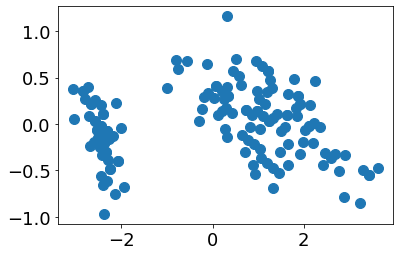

In [ ]:
plt.scatter(PCscore[:,0],PCscore[:,1])
# 아래의 그래프에서 가로축이 component1(가장 분산이 큰 방향의 성분1), 세로축이 component2이다.

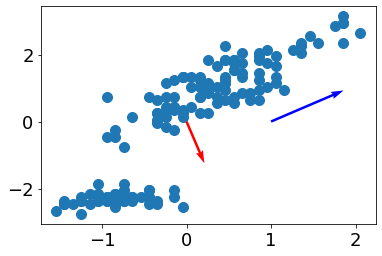

In [ ]:
# quiver to-research
dfmX = pd.DataFrame(mX)
plt.scatter(dfmX[0], dfmX[1])
origin = [0], [0]
plt.quiver(eigen_v[0], eigen_v[1], scale_units="xy", color=['r','b'], scale=1)
plt.show()

### another example

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

%matplotlib inline

In [ ]:
X, y = datasets.load_breast_cancer(return_X_y=True, as_frame=True)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
print(X.shape)
print(set(y))

targetDf = pd.DataFrame(y)

(569, 30)
{0, 1}


In [ ]:
# StandardScaler로 데이터를 단위 분산으로 조정 (평균 0, 분산 1)
X = StandardScaler().fit_transform(X)

In [ ]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, targetDf], axis=1)
finalDf.head()

,principal component 1,principal component 2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


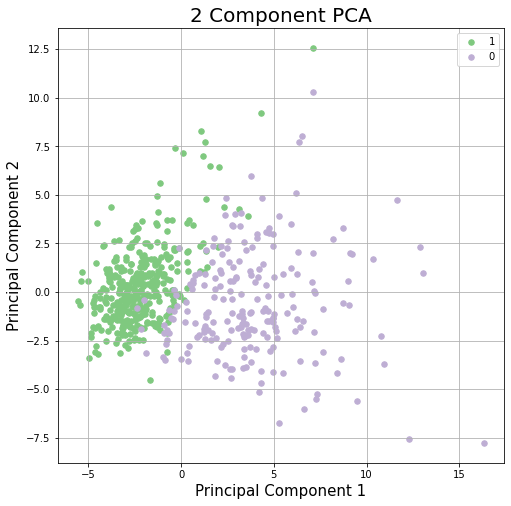

In [ ]:
labels = [1, 0]

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

colors = ["#7fc97f","#beaed4"]
for label, color in zip(labels, colors):
    indiciesToKeep = finalDf['target'] == label
    ax.scatter(finalDf.loc[indiciesToKeep, 'principal component 1']
                , finalDf.loc[indiciesToKeep, 'principal component 2']
                , c = color
                , s = 30)
                
ax.legend(labels)
ax.grid()

# Gaussian Naive Bayes<a id='section7'></a>
- 연속형: Gaussian Naive Bayes classifier
- 범주형: Multinomial Naive Bayes
    - 이분형: Bernoulli Naive Bayes

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# loading the dataset
X, y = datasets.load_iris(return_X_y=True, as_frame=True)

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
# modelling and fitting
gnb = GaussianNB()
fitted_gnb = gnb.fit(X, y)
y_pred = fitted_gnb.predict(X)

In [ ]:
fitted_gnb.predict_proba(X)[[1, 48, 51, 100]]
# 1, 48, 51, 100 인덱스의 데이터에 대해서..
    # 1번 인덱스가 타겟 0일 확률은 1, 타겟 1일 확률은 1.51e-017, ...

array([[1.00000000e+000, 1.51480769e-017, 2.34820051e-025],
       [1.00000000e+000, 2.63876217e-018, 2.79566024e-025],
       [7.27347795e-102, 9.45169639e-001, 5.48303606e-002],
       [3.23245181e-254, 6.35381031e-011, 1.00000000e+000]])

In [ ]:
fitted_gnb.predict(X)[[1, 48, 51, 100]]

array([0, 0, 1, 2])

In [ ]:
# confusion matrix
confusion_matrix(iris.target, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

In [ ]:
# 사전확률 설정 및 confusion matrix
gnb2=GaussianNB(priors=[1/100,1/100,98/100])
fitted2=gnb2.fit(iris.data,iris.target)
y_pred2=fitted2.predict(iris.data)
confusion_matrix(iris.target,y_pred2)

array([[50,  0,  0],
       [ 0, 33, 17],
       [ 0,  0, 50]])

In [ ]:
gnb2=GaussianNB(priors=[1/100,98/100,1/100])
fitted2=gnb2.fit(iris.data,iris.target)
y_pred2=fitted2.predict(iris.data)
confusion_matrix(iris.target,y_pred2)

# 2번째 범주의 사전확률을 98%로 주니까
    # 2번째 범주 예측은 다 맞추는데
    # 3번째 범주를 2번째로 예측하는 경우가 많아진다.

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 14, 36]])

### Multinomial Naive Bayes

In [ ]:
X = np.random.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6,])

In [ ]:
# modelling and fitting
clf = MultinomialNB()
clf.fit(X, y)

print(clf.predict(X[2:3]))
print(clf.predict_proba(X[2:3]))

[3]
[[1.81228274e-35 7.29343208e-39 1.00000000e+00 8.11519645e-36
  1.58234999e-31 4.53236916e-37]]


In [ ]:
# 사전확률(prior) 설정해보기
clf2 = MultinomialNB(class_prior=[0.1,0.5,0.1,0.1,0.1,0.1])
clf2.fit(X,y)
clf2.predict_proba(X[2:3])

array([[1.81228274e-35, 3.64671604e-38, 1.00000000e+00, 8.11519645e-36,
        1.58234999e-31, 4.53236916e-37]])

# KNN<a id='section8'></a>

In [4]:
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [5]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

In [6]:
# modelling and fitting
clf = neighbors.KNeighborsClassifier(5)
clf.fit(X,y)

y_pred = clf.predict(X)
confusion_matrix(y,y_pred)

array([[49,  1,  0],
       [ 0, 38, 12],
       [ 0, 12, 38]])

### cross-validation으로 최적의 k 찾기

In [7]:
from sklearn.model_selection import cross_val_score

k_range = range(1,100)
k_scores = []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

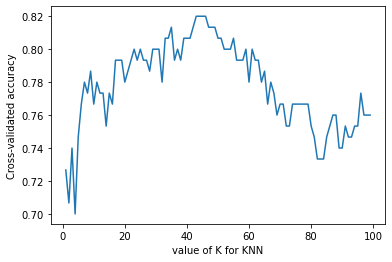

In [8]:
plt.plot(k_range, k_scores)
plt.xlabel('value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()

### Weight를 준 KNN

/var/folders/hh/14z5pty92_s51gdc2n406w6w0000gn/T/ipykernel_3902/2594962421.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
/var/folders/hh/14z5pty92_s51gdc2n406w6w0000gn/T/ipykernel_3902/2594962421.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


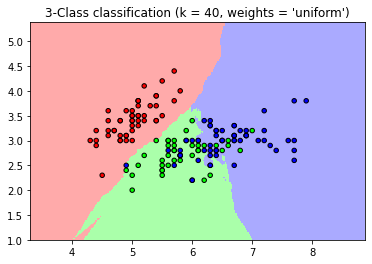

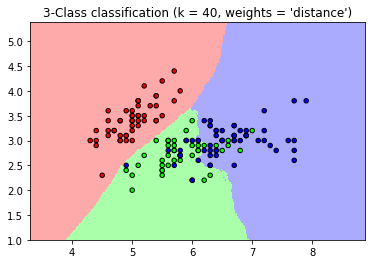

In [9]:
n_neighbors = 40
h = .02 # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [10]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(8))

In [11]:
knn = neighbors.KNeighborsRegressor(n_neighbors)
y_ = knn.fit(X, y).predict(T)

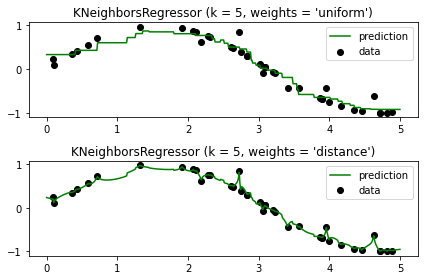

In [12]:
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()

# LDA<a id='section9'></a>

In [13]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Decision Tree<a id='section10'></a>